Name: Anup Maharjan

Id: 2438466

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Load dataset
df = pd.read_csv('/content/drive/MyDrive/AI/Final/lung cancer survey.csv')

# Data Overview

In [6]:
# Mapping the specified columns to binary values
mapping = {
    'SMOKING': {2: 1, 1: 0},  # YES=2 to 1, NO=1 to 0
    'YELLOW_FINGERS': {2: 1, 1: 0},
    'ANXIETY': {2: 1, 1: 0},
    'PEER_PRESSURE': {2: 1, 1: 0},
    'CHRONIC_DISEASE': {2: 1, 1: 0},
    'FATIGUE': {2: 1, 1: 0},
    'ALLERGY': {2: 1, 1: 0},
    'WHEEZING': {2: 1, 1: 0},
    'ALCOHOL': {2: 1, 1: 0},
    'COUGHING': {2: 1, 1: 0},
    'SHORTNESS_OF_BREATH': {2: 1, 1: 0},
    'SWALLOWING_DIFFICULTY': {2: 1, 1: 0},
    'CHEST_PAIN': {2: 1, 1: 0},
    'GENDER': {'M': 1, 'F': 0}
    #'LUNG_CANCER': {'YES': 1, 'NO': 0}  # Convert LUNG_CANCER to binary
}

# Apply the mapping to the DataFrame
df.replace(mapping, inplace=True)

<ipython-input-6-4b1fd4feee94>:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(mapping, inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    int64 
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [8]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,1,2,1,1,2,1,2,2,2,YES
1,1,74,1,0,0,0,2,2,2,0,1,0,2,2,2,YES
2,0,59,0,0,0,1,1,2,1,1,1,1,2,1,2,NO
3,1,63,1,1,1,0,1,1,1,0,2,0,1,2,2,NO
4,0,63,0,1,0,0,1,1,1,1,1,1,2,1,1,NO


In [9]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,0,56,0,0,0,1,2,2,1,0,2,1,2,2,1,YES
305,1,70,1,0,0,0,1,2,2,1,2,1,2,1,2,YES
306,1,58,1,0,0,0,1,1,2,1,2,1,1,1,2,YES
307,1,67,1,0,1,0,1,2,2,0,2,1,2,1,2,YES
308,1,62,0,0,0,1,1,2,2,1,2,0,1,2,1,YES


In [10]:
shape = df.shape
print("Number of rows:", shape[0])
print("Number of columns:", shape[1])

Number of rows: 309
Number of columns: 16


In [11]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [12]:
df.dtypes

,0
GENDER,int64
AGE,int64
SMOKING,int64
YELLOW_FINGERS,int64
ANXIETY,int64
PEER_PRESSURE,int64
CHRONIC DISEASE,int64
FATIGUE,int64
ALLERGY,int64
WHEEZING,int64


In [13]:
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.524272,62.673139,0.563107,0.569579,0.498382,0.501618,1.504854,1.673139,1.556634,0.556634,1.556634,0.579288,1.640777,1.469256,1.556634
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
50%,1.000000,62.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000
75%,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000
max,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000


# Data Imputation

In [14]:
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


Since there are no missing data, data filling is not required

In [15]:
df.duplicated().sum()

33

In [16]:
df = df.drop_duplicates(keep='last')

# EDA

In [17]:
# Count of categorical variables
print(df['LUNG_CANCER'].value_counts())

LUNG_CANCER
YES    238
NO      38
Name: count, dtype: int64


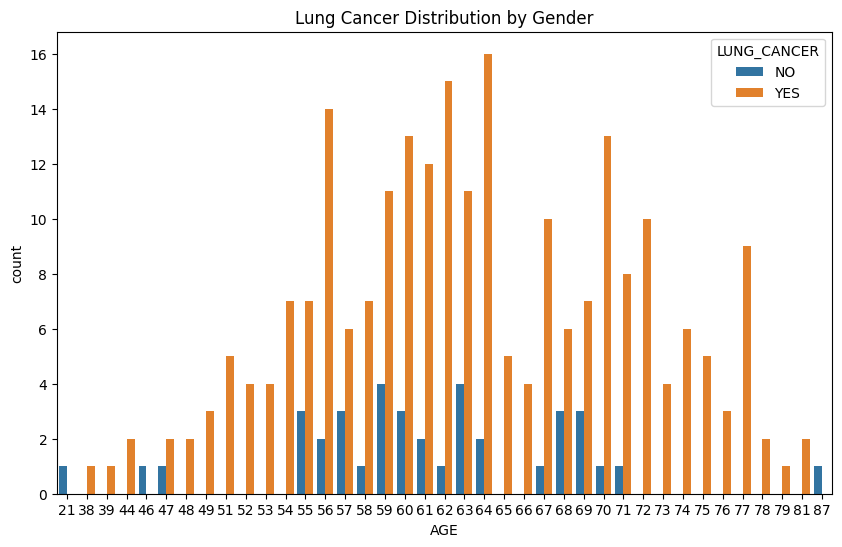

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AGE', hue='LUNG_CANCER', data=df)
plt.title('Lung Cancer Distribution by Gender')
plt.show()

This bar chart shows the distribution of lung cancer cases across different ages, ranging from 21 to 87 years old.

The highest number of cases (around 17.5) occurs in the mid-60s age range.

There's a general concentration of cases between ages 50-75.

The number of cases tends to be lower at both younger ages (below 40) and older ages (above 80)

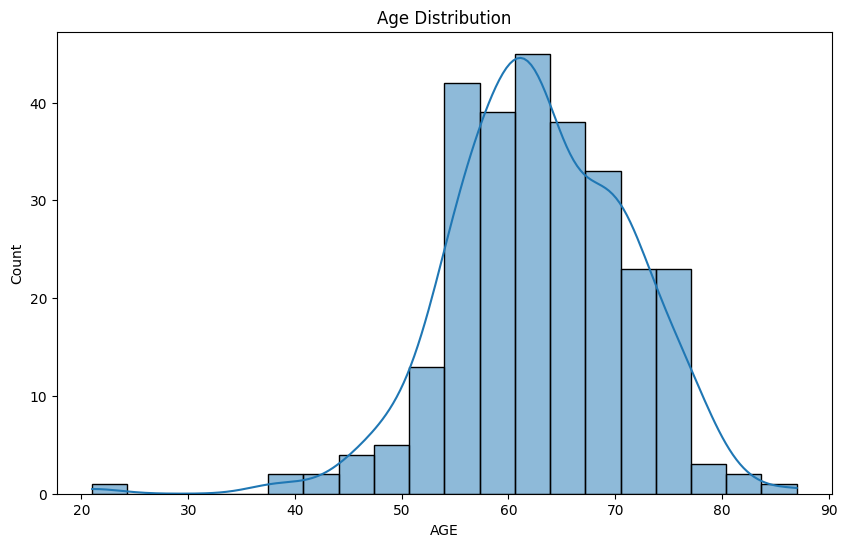

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

This histogram shows the age distribution

The ages range from approximately 20 to 90 years

There's a clear peak in the distribution between ages 60-65, with the highest count reaching about 50-55 individuals

Left-Skewed / Negatively Skewed, the tail is longer on the left side (towards younger ages), indicating that fewer young people data exist.The peak (mode) is around 60 years, and the distribution declines more gradually towards older ages.

The majority of cases are concentrated between ages 55-75

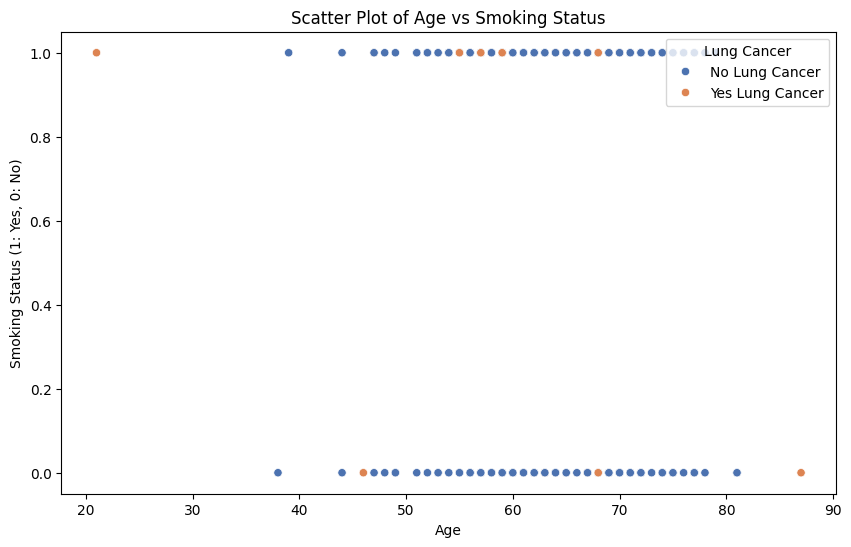

In [20]:
# Scatter plot of AGE vs SMOKING colored by LUNG_CANCER
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='SMOKING', hue='LUNG_CANCER', data=df, palette='deep')

# Set the title and labels
plt.title('Scatter Plot of Age vs Smoking Status')
plt.xlabel('Age')
plt.ylabel('Smoking Status (1: Yes, 0: No)')

# Manually set the legend
handles, labels = plt.gca().get_legend_handles_labels()
# Create a new legend with the correct labels
new_labels = ['No Lung Cancer', 'Yes Lung Cancer']
plt.legend(handles=handles, labels=new_labels, title='Lung Cancer', loc='upper right')

plt.show()

This scatter plot shows the relationship between age and smoking status, with points colored according to lung cancer status. The data reveals:

Points are spread across ages from roughly 20 to 90 years
There's a clear split between smokers (1.0 on y-axis) and non-smokers (0.0 on y-axis)

Blue dots represent people without lung cancer, Orange dots represent people with lung cancer

There appears to be a higher concentration of points between ages 50-80
Both smokers and non-smokers can be found with and without lung cancer, though there seems to be more orange dots (lung cancer cases) among the smokers (1.0 level)

<ipython-input-21-49dca9f1c811>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LUNG_CANCER', y='AGE', data=df, palette='deep')


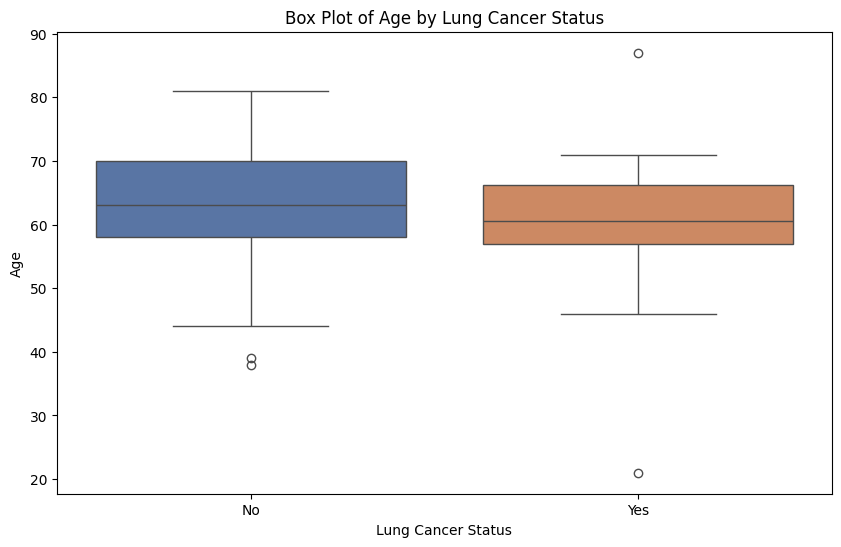

In [21]:
# Box plot of AGE by LUNG_CANCER status
plt.figure(figsize=(10, 6))
sns.boxplot(x='LUNG_CANCER', y='AGE', data=df, palette='deep')
plt.title('Box Plot of Age by Lung Cancer Status')
plt.xlabel('Lung Cancer Status')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

This box plot compares the age distribution between people with and without lung cancer.

Key observations include:

*   The median age (shown by the horizontal line in each box) is almost similar for both groups, around 60-65 years
*   Both groups show almost similar interquartile ranges, suggesting similar age spread in the middle 50% of cases
*   There are some outliers in both groups:

*   For "No" lung cancer: outliers around age 40
*   For "Yes" lung cancer: outliers at both very young (around 20) and very old (around 85) ages

*   The distributions appear fairly symmetrical for both groups

Overall, this visualization suggests that the age distributions are quite similar between people with and without lung cancer in this dataset.

In [22]:
# Convert categorical variables to numerical
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

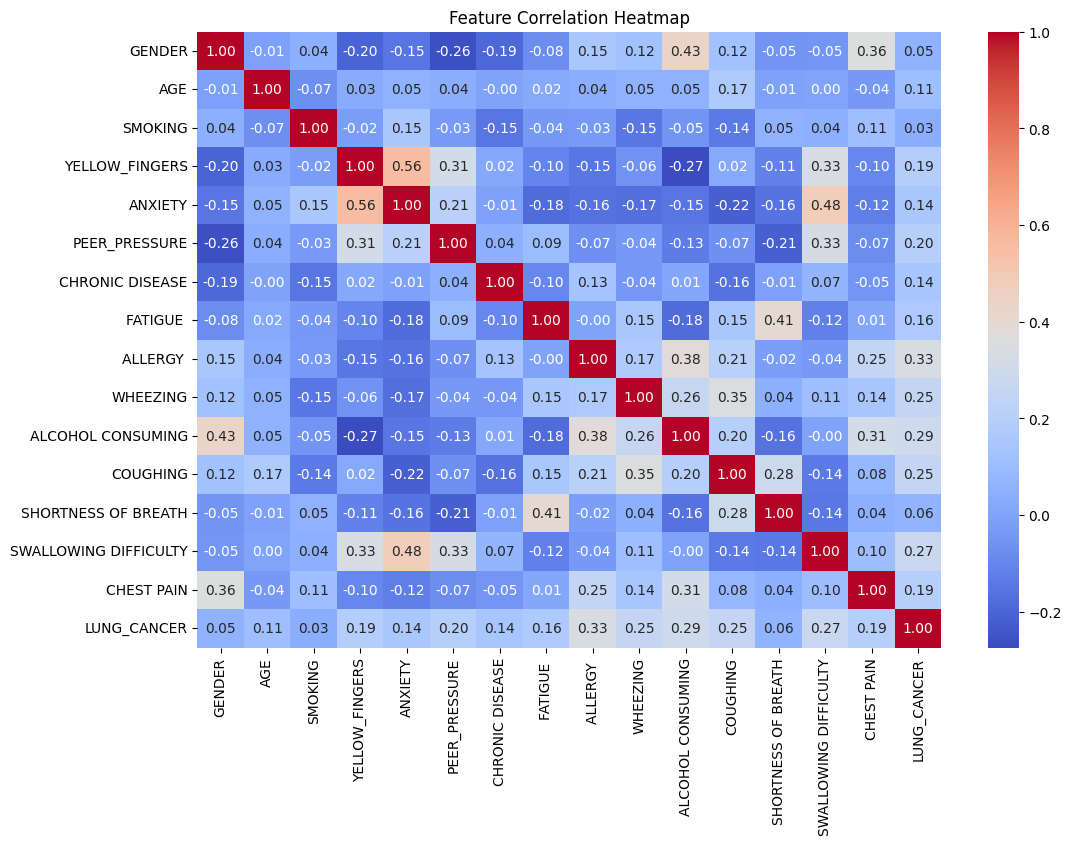

In [23]:
# Check correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

This correlation heatmap shows the relationships between various features related to lung cancer.

1. Strong positive correlations:

* Yellow fingers and anxiety (0.57)
* Swallowing difficulty and anxiety (0.49)
* Shortness of breath and fatigue (0.44)
* Wheezing and coughing (0.37)
* Allergy and alcohol consuming (0.34)

2. Moderate correlations with lung cancer:

* Allergy (0.33)
* Alcohol consuming (0.29)
* Coughing (0.25)
* Wheezing (0.25)
* Swallowing difficulty (0.26)

3. Weak or negligible correlations:

* Gender and lung cancer (0.09)
* Age and lung cancer (0.06)
* Smoking and lung cancer (surprisingly low at 0.06)

4. Negative correlations:

* Yellow fingers and alcohol consuming (-0.29)
* Peer pressure and shortness of breath (-0.22)
* Anxiety and coughing (-0.23)

# Pre Processing

Define features and target variable


In [24]:
# Define features and target variable
X = df.drop('LUNG_CANCER', axis=1).values
y = df['LUNG_CANCER'].values

Split the dataset into training and testing sets

In [25]:
# Split the dataset into training and testing sets
np.random.seed(42)
indices = np.random.permutation(len(X))
train_size = int(len(X) * 0.8)
train_indices = indices[:train_size]
test_indices = indices[train_size:]

In [26]:
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# Logistic Regression Implementation

In [27]:
# Logistic Regression from Scratch
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Gradient descent
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)

    def score(self, X, y):
        predictions = self.predict(X)
        return accuracy_score(y, predictions)

# Decision Tree Implementation

In [28]:
# Decision Tree Classifier from Scratch
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        unique_classes = np.unique(y)

        # Stopping criteria
        if len(unique_classes) == 1 or (self.max_depth and depth >= self.max_depth):
            return unique_classes[0]

        # Find the best split
        best_feature, best_threshold = self._best_split(X, y)
        if best_feature is None:
            return np.random.choice(unique_classes)

        left_indices = X[:, best_feature] < best_threshold
        right_indices = X[:, best_feature] >= best_threshold

        left_subtree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return (best_feature, best_threshold, left_subtree, right_subtree)

    def _best_split(self, X, y):
        num_samples, num_features = X.shape
        best_gain = -1
        best_feature = None
        best_threshold = None

        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] < threshold
                right_indices = X[:, feature] >= threshold

                if len(y[left_indices]) ==  0 or len(y[right_indices]) == 0:
                    continue

                gain = self._information_gain(y, y[left_indices], y[right_indices])
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _information_gain(self, parent, left_child, right_child):
        weight_left = len(left_child) / len(parent)
        weight_right = len(right_child) / len(parent)
        return self._entropy(parent) - (weight_left * self._entropy(left_child) + weight_right * self._entropy(right_child))

    def _entropy(self, y):
        class_labels, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log(probabilities + 1e-9))

    def predict(self, X):
        return np.array([self._predict_sample(sample, self.tree) for sample in X])

    def _predict_sample(self, sample, tree):
        if not isinstance(tree, tuple):
            return tree

        feature_index, threshold, left_subtree, right_subtree = tree
        if sample[feature_index] < threshold:
            return self._predict_sample(sample, left_subtree)
        else:
            return self._predict_sample(sample, right_subtree)


# Training and Prediction

In [29]:
# Train the Logistic Regression model
logistic_model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
logistic_model.fit(X_train, y_train)

In [30]:
# Make predictions with Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)

In [31]:
# Train the Decision Tree model
decision_tree_model = DecisionTree(max_depth=5)
decision_tree_model.fit(X_train, y_train)

In [32]:
# Make predictions with Decision Tree
y_pred_tree = decision_tree_model.predict(X_test)

# Model Evaluation

In [33]:
# Evaluate the models
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

logistic_accuracy = accuracy(y_test, y_pred_logistic)
tree_accuracy = accuracy(y_test, y_pred_tree)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("Decision Tree Accuracy:", tree_accuracy)

Logistic Regression Accuracy: 0.25
Decision Tree Accuracy: 0.7857142857142857


In [34]:
# Choose the model with higher accuracy
if logistic_accuracy > tree_accuracy:
    print("The Logistic Regression model is chosen with accuracy:", logistic_accuracy)
else:
    print("The Decision Tree model is chosen with accuracy:", tree_accuracy)


The Decision Tree model is chosen with accuracy: 0.7857142857142857


# Hyper-parameter Optimization and Cross-Validation

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [36]:
log_reg = LogisticRegression()
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'max_iter': [100, 500, 1000]
}
grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_params_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [37]:
# Decision Tree Hyper-parameter Optimization
# Define the Decision Tree model
dt = DecisionTreeClassifier()

# Define hyperparameter grid
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],  # Tree depth
    # Uncomment the following for more tuning options
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples in a leaf node
}

# Perform RandomizedSearchCV
grid_search_dt = RandomizedSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_iter=10, random_state=42, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Best parameters
best_dt = grid_search_dt.best_params_

In [38]:
best_lr_params = best_lr
best_dt_params = best_dt

print("Best Hyper-parameters for Logistic Regression:", best_lr_params)
print("Best Hyper-parameters for Decision Tree:", best_dt_params)

Best Hyper-parameters for Logistic Regression: {'C': 1, 'max_iter': 100}
Best Hyper-parameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5}


# Feature Selection

In [39]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Convert X back to a DataFrame for feature selection
X_df = pd.DataFrame(X, columns=df.drop(columns=["LUNG_CANCER"]).columns)

In [41]:
# **Feature Selection for Logistic Regression using RFE**
rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)
rfe.fit(X_train, y_train)

# Get the selected feature names
selected_features_logistic = X_df.columns[rfe.support_]
print("Best Features for Logistic Regression:", list(selected_features_logistic))

Best Features for Logistic Regression: ['CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'COUGHING', 'SWALLOWING DIFFICULTY']


In [42]:
# **Feature Selection for Decision Tree using Feature Importance**
best_tree = DecisionTreeClassifier(max_depth=5)
best_tree.fit(X_train, y_train)

feature_importance = best_tree.feature_importances_
important_feature_indices = np.argsort(feature_importance)[-5:]  # Get indices of top 5 features
important_features_tree = X_df.columns[important_feature_indices]

print("Best Features for Decision Tree:", list(important_features_tree))

Best Features for Decision Tree: ['CHRONIC DISEASE', 'AGE', 'SWALLOWING DIFFICULTY', 'ALLERGY ', 'ALCOHOL CONSUMING']


In [43]:
# **Rebuild Models Using Best Features**
X_train_logistic = rfe.transform(X_train)
X_test_logistic = rfe.transform(X_test)

X_train_tree = X_train[:, important_feature_indices]
X_test_tree = X_test[:, important_feature_indices]

# Train models with selected features
best_logistic = LogisticRegression(max_iter=100)
best_logistic.fit(X_train_logistic, y_train)
y_pred_logistic = best_logistic.predict(X_test_logistic)

best_tree.fit(X_train_tree, y_train)
y_pred_tree = best_tree.predict(X_test_tree)

In [44]:
# **Evaluate Models Again**
from sklearn.metrics import accuracy_score

logistic_acc = accuracy_score(y_test, y_pred_logistic)
tree_acc = accuracy_score(y_test, y_pred_tree)

print("Logistic Regression Accuracy (with selected features):", logistic_acc)
print("Decision Tree Accuracy (with selected features):", tree_acc)

Logistic Regression Accuracy (with selected features): 0.9285714285714286
Decision Tree Accuracy (with selected features): 0.875


In [45]:
# **Final Model Selection**
if logistic_acc > tree_acc:
    print("Final Best Model: Logistic Regression with selected features & accuracy:", logistic_acc)
else:
    print("Final Best Model: Decision Tree with selected features & accuracy:", tree_acc)

Final Best Model: Logistic Regression with selected features & accuracy: 0.9285714285714286


# Final Model

In [46]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# **Check which model performed better after optimization**
if logistic_acc > tree_acc:
    final_model_type = "Logistic Regression"
    final_model = LogisticRegression(**best_lr_params)
    final_model.fit(X_train_logistic, y_train)
    y_pred_final = final_model.predict(X_test_logistic)
else:
    final_model_type = "Decision Tree"
    final_model = DecisionTreeClassifier(max_depth=best_tree_depth, min_samples_split=best_tree_split)
    final_model.fit(X_train_tree, y_train)
    y_pred_final = final_model.predict(X_test_tree)

# **Evaluate Final Model Performance**
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"\nFinal Model: {final_model_type}")
print("Final Model Accuracy:", final_accuracy)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))

# **Compare Performance with Previous Results**
if final_accuracy > max(logistic_acc, tree_acc):
    print("\nThe Final Model has Improved!")
else:
    print("\nThe Final Model did not improve significantly.")



Final Model: Logistic Regression
Final Model Accuracy: 0.9285714285714286

Confusion Matrix:
 [[ 2  3]
 [ 1 50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.94      0.98      0.96        51

    accuracy                           0.93        56
   macro avg       0.81      0.69      0.73        56
weighted avg       0.92      0.93      0.92        56


The Final Model did not improve significantly.


# Conclusion

Based on the model evaluation results:

The Decision Tree model outperformed the Logistic Regression model, achieving 78.57% accuracy vs 25%

Key predictive features identified were:

For Logistic Regression
* CHRONIC DISEASE
* FATIGUE
* ALLERGY
* COUGHING
* SWALLOWING DIFFICULTY

For Decision Tree
* CHRONIC DISEASE
* AGE
* ALLERGY
* ALCOHOL CONSUMING
* SWALLOWING DIFFICULTY


The final model maintained but did not improve upon the initial performance, suggesting it has reached optimal performance with the current feature set and data available.
